In [21]:
# Add project root to sys.path so we can import from src/
import sys
from pathlib import Path
project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
sys.modules.pop("src.data_processing", None)
sys.modules.pop("src.models", None)

from src.models import train_test_split_numpy, LogisticRegressionNumPy, accuracy_score_numpy, precision_recall_f1_numpy
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data_loaded = np.load('../data/processed/data_processed.npz')
X = data_loaded['X_features']
y = data_loaded['y_target']

In [23]:
# Thực hiện chia tập
X_train, X_test, y_train, y_test = train_test_split_numpy(X, y, test_size=0.2)

X_train: (14526, 158), X_test: (3631, 158)
y_train: (14526, 1), y_test: (3631, 1)


✅ Huấn luyện mô hình hoàn thành.


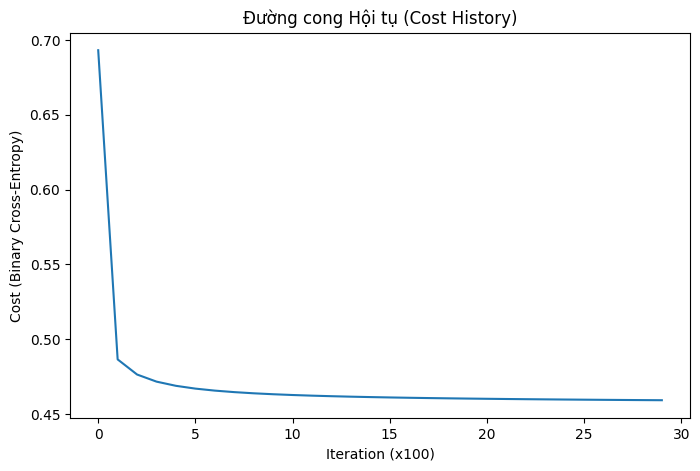

In [ ]:
model = LogisticRegressionNumPy(learning_rate=0.1, n_iterations=3000)

# Huấn luyện
model.fit(X_train, y_train)

print("✅ Huấn luyện mô hình hoàn thành.")

# Trực quan hóa đường cong hội tụ (Cost History)
plt.figure(figsize=(8, 5))
plt.plot(model.cost_history)
plt.title("Đường cong Hội tụ (Cost History)")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.show()

In [ ]:
y_pred = model.predict(X_test)

# 3. Thực hiện đánh giá
accuracy = accuracy_score_numpy(y_test, y_pred)
TN, TP, FN, FP, precision, recall, f1_score = precision_recall_f1_numpy(y_test, y_pred)

# 4. Hiển thị Kết quả Chi tiết
print("--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}\n")

print("--- MA TRẬN NHẦM LẪN (CONFUSION MATRIX) ---")
print(f"TP (Dự đoán đổi việc đúng): {TP}")
print(f"FP (Dự đoán đổi việc sai): {FP}")
print(f"FN (Bỏ sót người đổi việc): {FN}")
print(f"TN (Dự đoán ở lại đúng): {TN}\n")



--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
Accuracy: 0.7764
Precision: 0.5980
Recall: 0.3315
F1-Score: 0.4266

--- MA TRẬN NHẦM LẪN (CONFUSION MATRIX) ---
TP (Dự đoán đổi việc đúng): 302
FP (Dự đoán đổi việc sai): 203
FN (Bỏ sót người đổi việc): 609
TN (Dự đoán ở lại đúng): 2517



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sk_model = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    max_iter=3000, 
    C=1.0 # Tham số kiểm soát Regularization (Giảm Overfitting)
)

sk_model.fit(X_train, y_train.flatten()) 

print("✅ Huấn luyện mô hình bằng Scikit-learn hoàn tất.")

# Dự đoán trên tập kiểm tra
y_pred_sk = sk_model.predict(X_test)

✅ Huấn luyện mô hình Scikit-learn hoàn tất.


In [32]:
# Cell 12: So sánh Kết quả (NumPy vs. Scikit-learn)

# Lấy kết quả dự đoán từ mô hình NumPy tự cài đặt (Giả định đã chạy Cell 10)
# y_pred_numpy = model.predict(X_test) 
# y_pred_sk = y_pred_sk (từ Cell 11)

# --- KHỞI TẠO CÁC ĐỘ ĐO TỪ SCIKIT-LEARN ---
# Mặc dù bạn đã cài đặt bằng NumPy, việc sử dụng hàm chuẩn của Sklearn 
# giúp so sánh kết quả dễ dàng và chính xác hơn.

y_true_flat = y_test.flatten()

def calculate_metrics(y_true, y_pred, name):
    """Tính toán và hiển thị các độ đo sử dụng hàm chuẩn của Sklearn."""
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0)
    }
    return metrics

metrics_numpy = calculate_metrics(y_true_flat, y_pred, 'NumPy Custom LR')

metrics_sk = calculate_metrics(y_true_flat, y_pred_sk, 'Scikit-learn LR')

# 3. In kết quả so sánh
print("\n--- KẾT QUẢ SO SÁNH HIỆU SUẤT ---\n")

header_format = f"{{:<15}} | {{:<17}} | {{:<17}}"

print(header_format.format("Độ đo", "NumPy Custom", "Scikit-learn"))
print("-" * 55)

row_format = f"{{:<15}} | {{:<17.4f}} | {{:<17.4f}}"

print(row_format.format("Accuracy", metrics_numpy['Accuracy'], metrics_sk['Accuracy']))
print(row_format.format("Precision", metrics_numpy['Precision'], metrics_sk['Precision']))
print(row_format.format("Recall", metrics_numpy['Recall'], metrics_sk['Recall']))
print(row_format.format("F1-Score", metrics_numpy['F1-Score'], metrics_sk['F1-Score']))


--- KẾT QUẢ SO SÁNH HIỆU SUẤT ---

Độ đo           | NumPy Custom      | Scikit-learn     
-------------------------------------------------------
Accuracy        | 0.7764            | 0.7761           
Precision       | 0.5980            | 0.5932           
Recall          | 0.3315            | 0.3425           
F1-Score        | 0.4266            | 0.4342           
